<center><font color = "Human Activity Recognition using Smartphone data"</font></center>

<center><font color ="Human Activity Recognition using Smartphone data"></font></center>

 # <font color ='red'>Human Activity Recognition using Smartphone data</font>

 <center><img src ="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-33-6307-6_8/MediaObjects/497705_1_En_8_Fig1_HTML.png"</center>

## Table points
### 1.[Import Libraries](#import)
### 2.[Load the data](#load)
### 3.[Data Wrangling](#Wrangling)
### 4.[Exploratory Data Analysis](#EDA)
### 5.[Analysing Data](#Analyse)
### 6.[Data preparation for ML models](#prepare)
### 7.[Logistic regression model](#logistic)
### 8.[SVM model](#svm)
### 9.[Decision Tree And Random Forest](#tree)

## **1.Import Liabraries**<a class ="anchor" id ="import"></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## **2.Load the Data**<a class ="anchor" id ="load"></a>

In [8]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


## **3.Data Wrangling**<a class ="anchor" id ="Wrangling"></a>

### Data preprocessing

In [15]:
print("Number of duplicated in train : ",sum(train.duplicated()))
print("Number of duplicated in test : ",sum(test.duplicated()))

Number of duplicated in train :  0
Number of duplicated in test :  0


### checking missing values

In [17]:
print("Missing values in train : ",train.isnull().values.sum())
print("Missing values in test : ",test.isnull().values.sum())

Missing values in train :  0
Missing values in test :  0


### checking for class imbalance

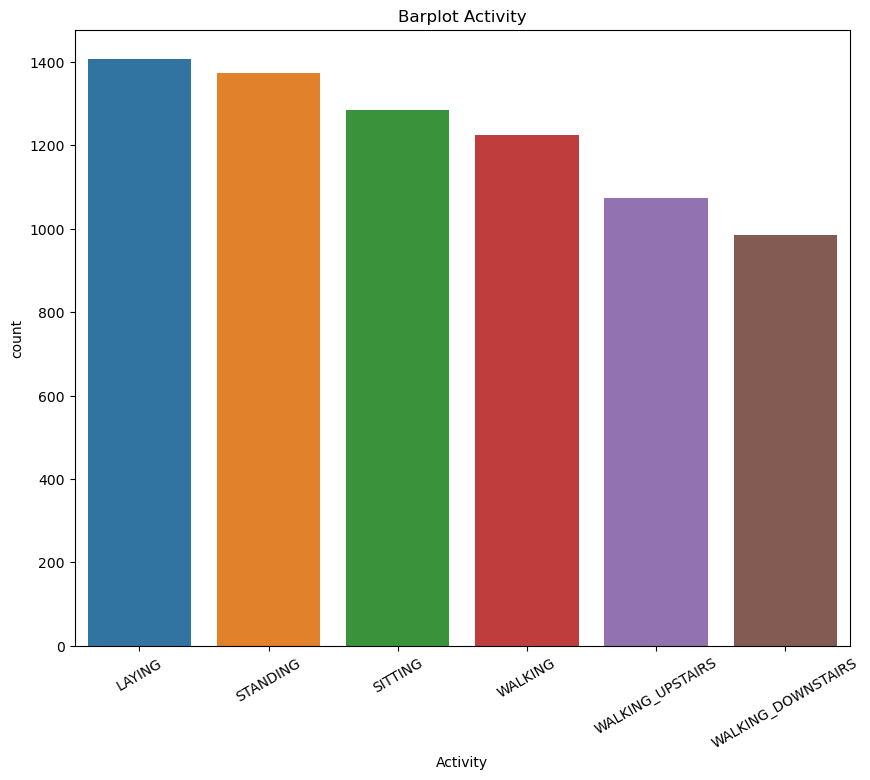

In [19]:
plt.figure(figsize=(10,8))
plt.title('Barplot Activity')
order=train['Activity'].value_counts().index
sns.countplot(data=train,x='Activity',order=order)
plt.xticks(rotation=30)
plt.show()

There is almost same number of observations across all the six activities so this data does not have class imbalance problem

## **4.Exploratory Data Analysis**<a class ="anchor" id ="EDA"></a>

In [22]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [23]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [24]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### Analysing tBodyAccMag-mean feature

<Figure size 1000x700 with 0 Axes>

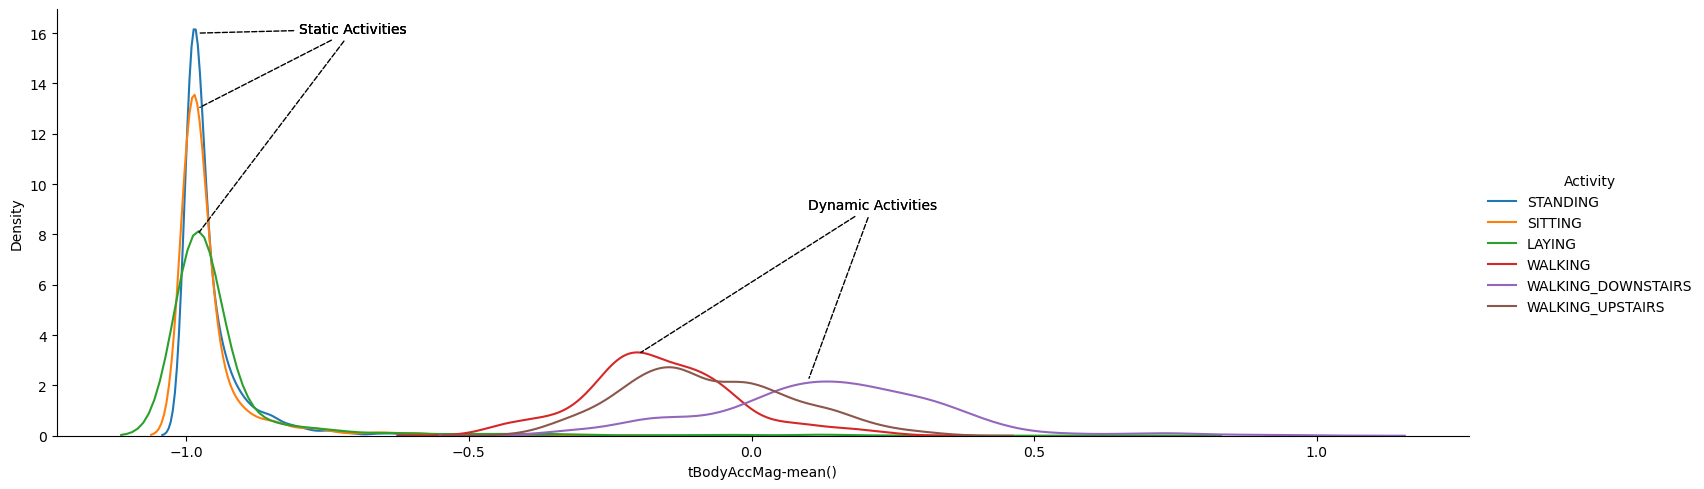

In [26]:
plt.figure(figsize=(10,7))
facetgrid = sns.FacetGrid(data=train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.kdeplot,'tBodyAccMag-mean()')
facetgrid.add_legend()

plt.annotate('Static Activities',xy={-.98,8},xytext={-.8,16},arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy={-.98,13},xytext={-.8,16},arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy={-.98,16},xytext={-.8,16},arrowprops={'arrowstyle':'-','ls':'dashed'})


plt.annotate('Dynamic Activities',xy={-.2,3.25},xytext={0.1,9},arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy={0.1,2.18},xytext={0.1,9},arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy={-0.01,2.15},xytext={0.1,9},arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.show()

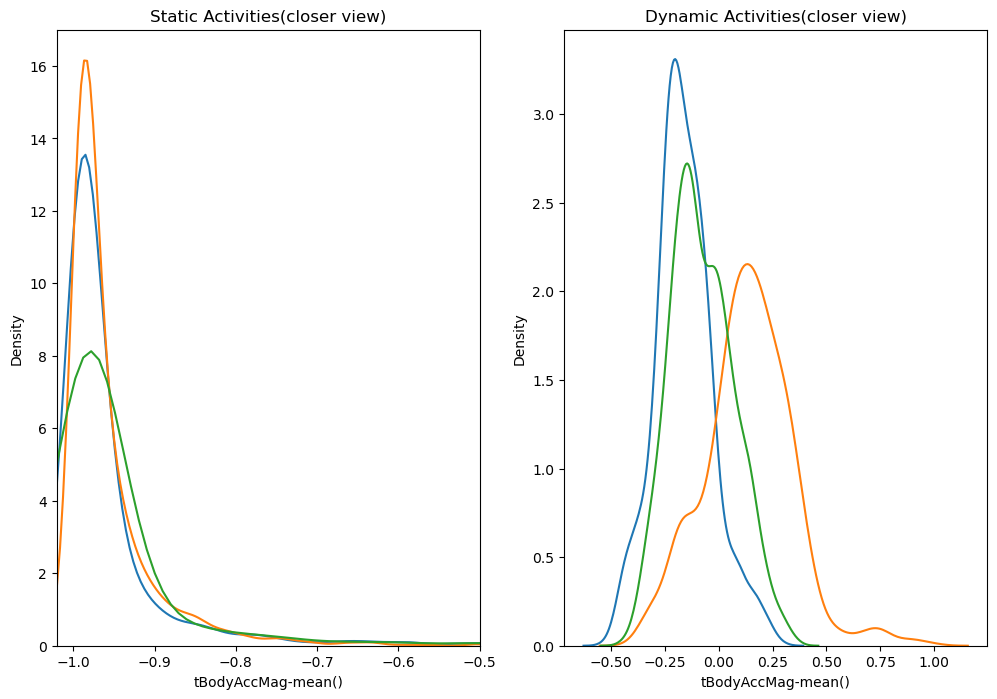

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

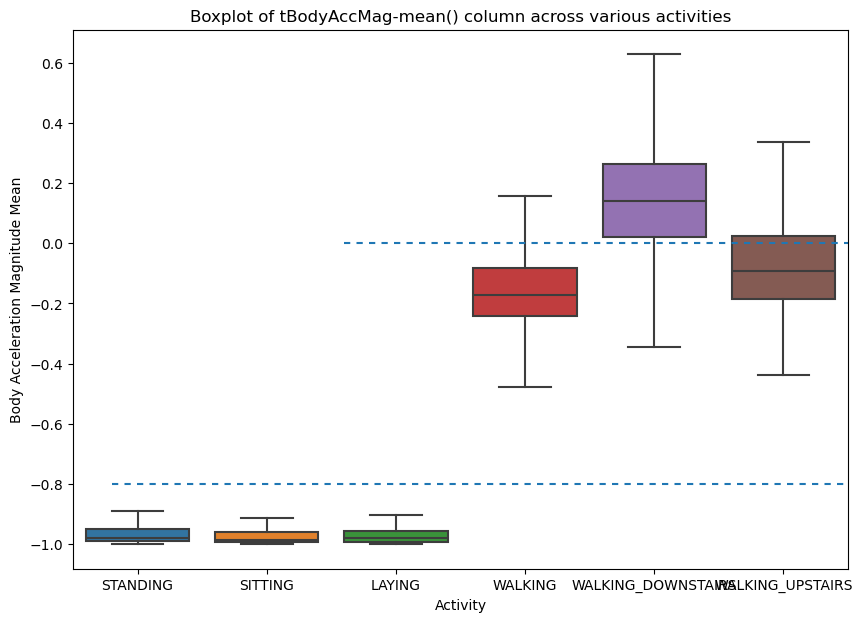

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers=False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.title('Boxplot of tBodyAccMag-mean() column across various activities')
plt.axhline(y=-0.8,xmin=0.05,dashes=(3,3))
plt.axhline(y=0.0,xmin=0.35,dashes=(3,3))
plt.show()

### Analysing angle between x_axis and gravityMean feature

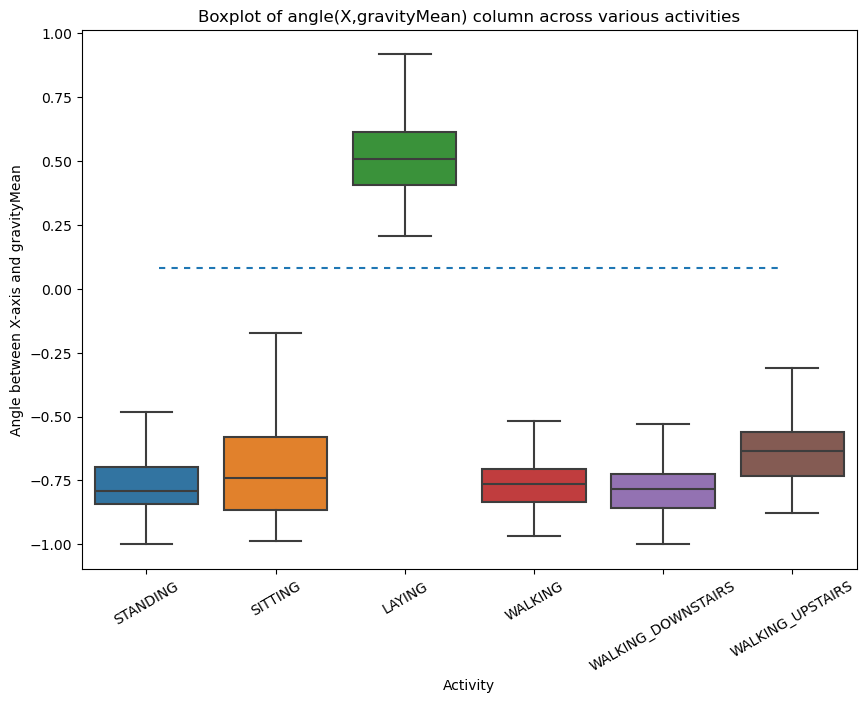

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data=train,showfliers=False)
plt.ylabel('Angle between X-axis and gravityMean')
plt.title('Boxplot of angle(X,gravityMean) column across various activities')
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,dashes=(3,3))
plt.xticks(rotation=30)
plt.show()

### Analysing Angle between Y-axis and GravityMean feature

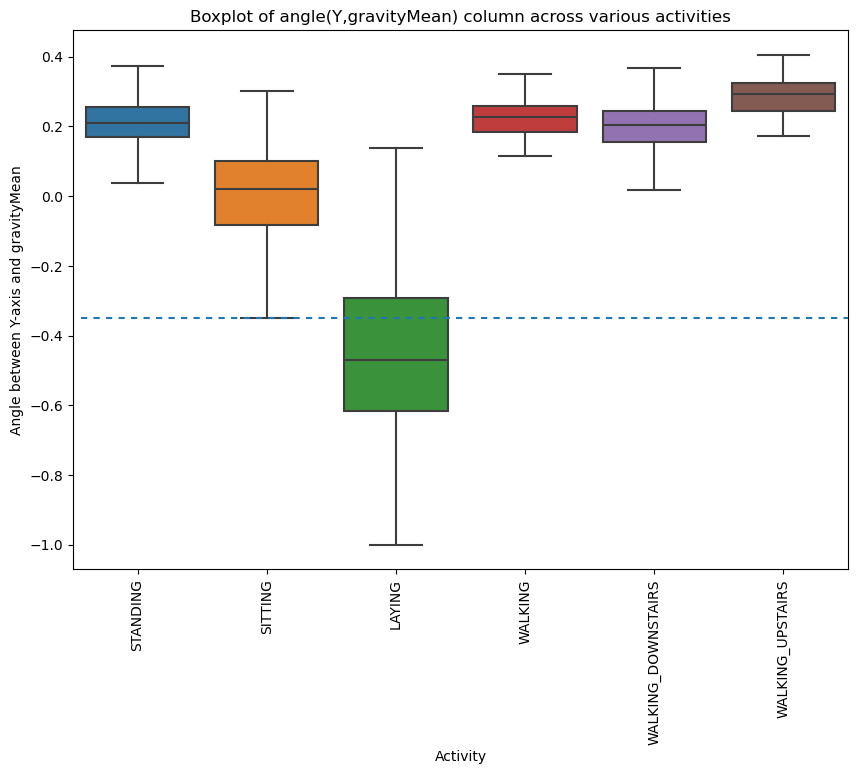

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers=False)
plt.ylabel('Angle between Y-axis and gravityMean')
plt.title('Boxplot of angle(Y,gravityMean) column across various activities')
plt.axhline(y=-0.35,xmin=0.01,dashes=(3,3))
plt.xticks(rotation=90)
plt.show()

## **5.Analysing Data**<a class ="anchor" id ="Analyse"></a>

### Visualizing data using PCA

In [35]:
x_pca = train.drop(['subject','Activity'],axis=1)
pca = PCA(n_components=2,random_state=0).fit_transform(x_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

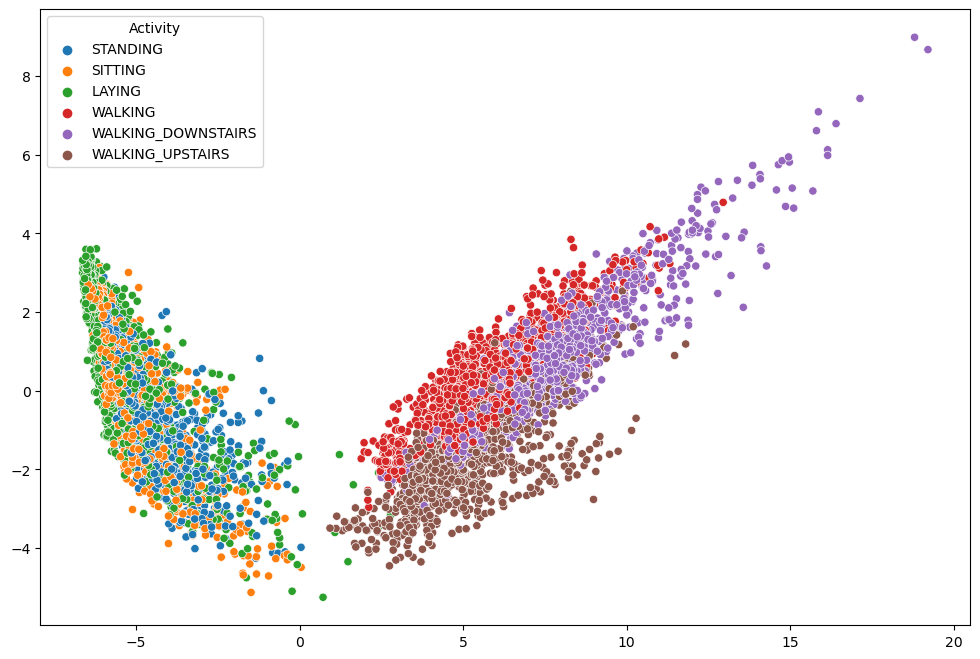

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

### Visualizing data using TSNE

In [38]:
x_tsne = train.drop(['subject','Activity'],axis=1)
tsne = TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_tsne)
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

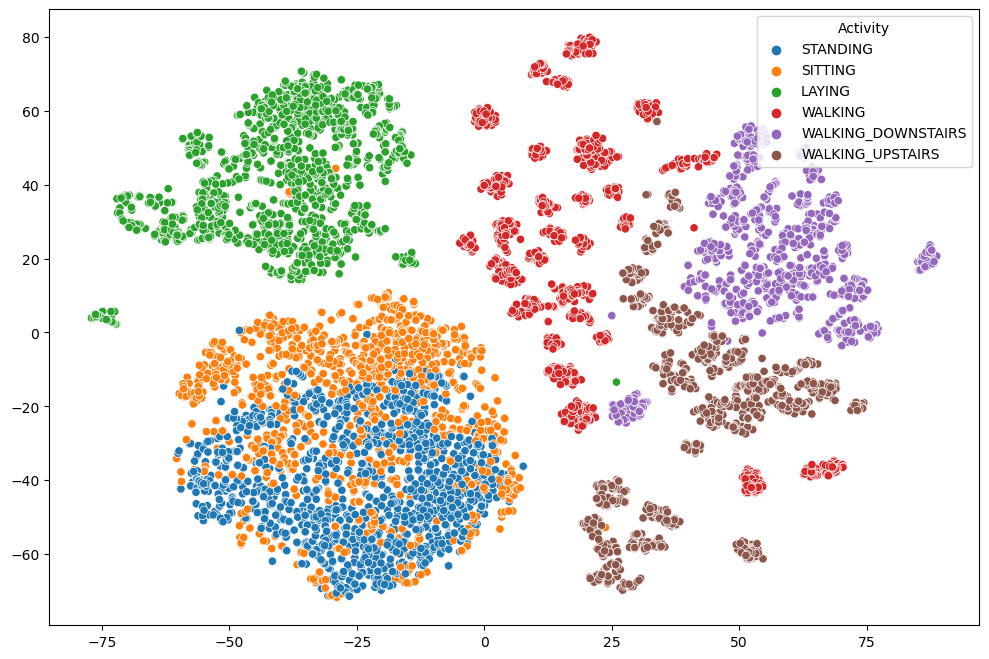

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

## **6.Data Preparation for ML model**<a class ="anchor" id ="prepare"></a>

In [41]:
x_train = train.drop(['subject','Activity'],axis=1)
y_train = train['Activity']

x_test = test.drop(['subject','Activity'],axis=1)
y_test = test['Activity']

In [42]:
print('Training data size : ',x_train.shape)
print('Testing data size : ',x_test.shape)

Training data size :  (7352, 561)
Testing data size :  (2947, 561)


## **7.Logistic Regression Model**<a class ="anchor" id ="logistic"></a>

In [44]:
parameters = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()
lr_random = RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_random.fit(x_train,y_train)
best_model = lr_random.best_estimator_
pred_value = best_model.predict(x_test)

In [45]:
lr_accuracy = accuracy_score(y_true=y_test,y_pred=pred_value)
print('Accuracy using Logistic regression : ',lr_accuracy)

Accuracy using Logistic regression :  0.9613165931455717


In [46]:
cm = confusion_matrix(y_test.values,pred_value)
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 432,  56,   0,   0,   3],
       [  0,  11, 521,   0,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 405,  12],
       [  0,   0,   0,  26,   0, 445]], dtype=int64)

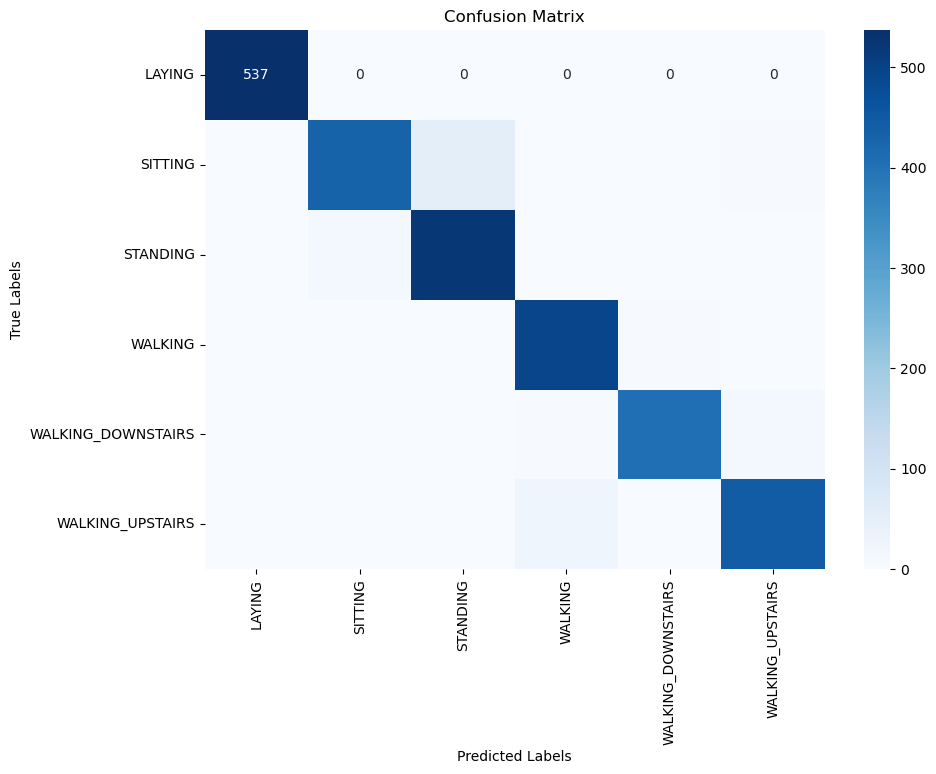

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], 
            yticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [48]:
## function to get best random search attributes
def best_randomsearch(model):
    print('Best estimator : ',model.best_estimator_)
    print('Best set of parameters : ',model.best_params_)
    
## getting best random search attributes
best_randomsearch(lr_random)


Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


## **8.SVM Model**<a class ="anchor" id ="svm"></a>

In [50]:
parameters ={'kernel':['linear','rbf','poly','sigmoid'],
             'C':[100,50]}
svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=42)
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [51]:
pred_value_svm = svm_rs.predict(x_test)
pred_value_svm

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [52]:
svm_accuracy = accuracy_score(y_test,pred_value_svm)
print('Accuracy using kernel SVM : ',svm_accuracy)

Accuracy using kernel SVM :  0.9650492025788938


In [53]:
cm_svm = confusion_matrix(y_test.values,pred_value_svm)
cm_svm

array([[537,   0,   0,   0,   0,   0],
       [  0, 444,  45,   0,   0,   2],
       [  0,  10, 522,   0,   0,   0],
       [  0,   0,   0, 489,   3,   4],
       [  0,   0,   0,   4, 398,  18],
       [  0,   0,   0,  16,   1, 454]], dtype=int64)

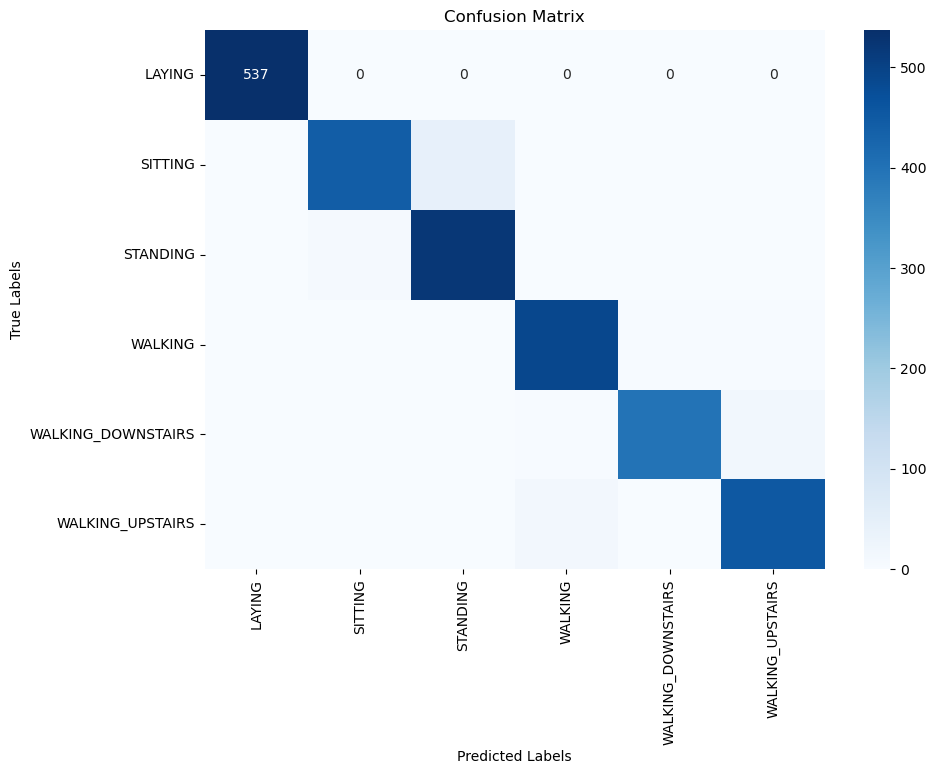

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], 
            yticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [55]:
best_randomsearch(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


## **9.Decision Tree And Random Forest**<a class ="anchor" id ="tree"></a>

### Random Forest

In [58]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)}
rf_classifier = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state=42)
rf_random.fit(x_train,y_train)
pred_value_rf = rf_random.predict(x_test)
#pred_value_rf

In [59]:
rf_accuracy = accuracy_score(y_true=y_test,y_pred=pred_value_rf)
print('Accuracy using Random forest : ',rf_accuracy)

Accuracy using Logistic regression :  0.9256871394638616


In [60]:
cm_rf = confusion_matrix(y_test.values,pred_value_svm)
cm_rf

array([[537,   0,   0,   0,   0,   0],
       [  0, 444,  45,   0,   0,   2],
       [  0,  10, 522,   0,   0,   0],
       [  0,   0,   0, 489,   3,   4],
       [  0,   0,   0,   4, 398,  18],
       [  0,   0,   0,  16,   1, 454]], dtype=int64)

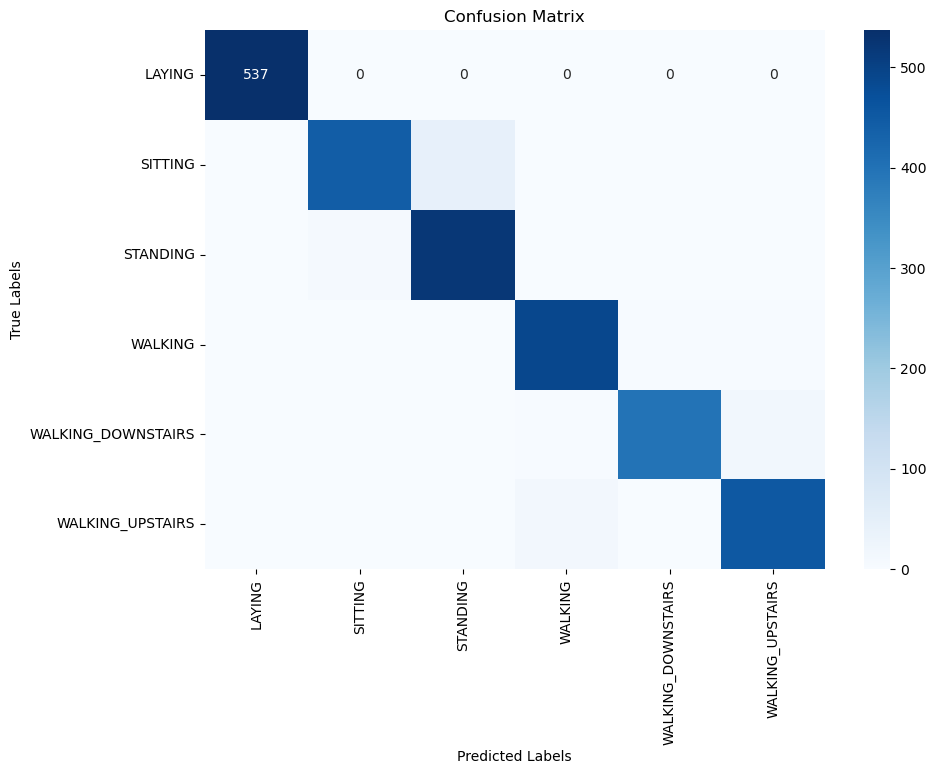

In [61]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], 
            yticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
best_randomsearch(rf_random)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}


### Decision Tree

In [105]:
parameters ={'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2']}
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(dt,param_distributions=parameters,random_state=42)
dt_random.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=42)

In [109]:
pred_value_dt=dt_random.predict(x_test)
pred_value_dt

array(['STANDING', 'STANDING', 'SITTING', ..., 'WALKING_UPSTAIRS',
       'WALKING', 'WALKING_UPSTAIRS'], dtype=object)

In [111]:
dt_accuracy = accuracy_score(y_true=y_test,y_pred=pred_value_dt)
print('Accuracy using Decision Tree : ',dt_accuracy)

Accuracy using Logistic regression :  0.7801153715643027


In [113]:
cm_dt = confusion_matrix(y_test.values,pred_value_dt)
cm_dt

array([[507,  16,  14,   0,   0,   0],
       [ 12, 365, 114,   0,   0,   0],
       [ 14, 123, 394,   0,   1,   0],
       [  0,   0,   0, 434,  24,  38],
       [  0,   0,   0,  50, 271,  99],
       [  0,   0,   0,  80,  63, 328]], dtype=int64)

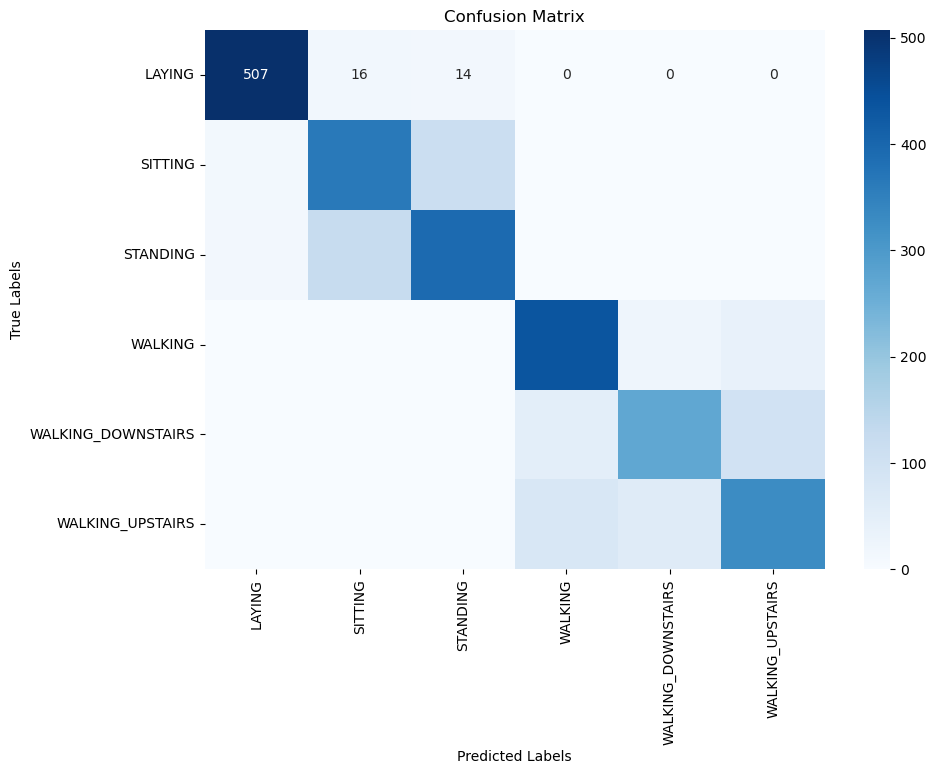

In [115]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'], 
            yticklabels=['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [117]:
best_randomsearch(dt_random)

Best estimator :  DecisionTreeClassifier(max_features='auto')
Best set of parameters :  {'max_features': 'auto', 'criterion': 'gini'}
